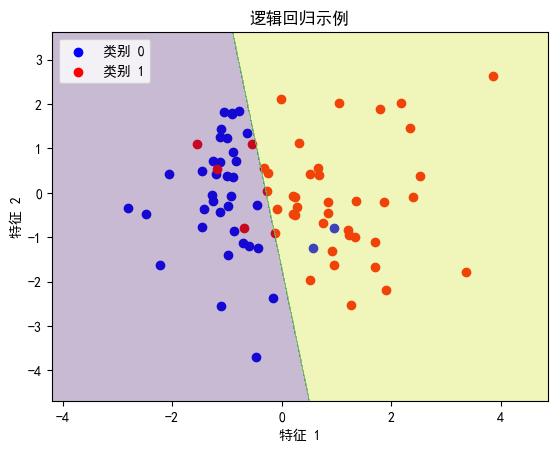

模型准确率: 1.00


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 使负号正常显示

# 生成示例数据
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=0)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建逻辑回归模型
model = LogisticRegression()

# 训练模型
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 可视化结果
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', label='类别 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', label='类别 1')

# 绘制决策边界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)

plt.xlabel('特征 1')
plt.ylabel('特征 2')
plt.title('逻辑回归示例')
plt.legend()
plt.show()

# 打印模型的准确率
accuracy = model.score(X_test, y_test)
print(f'模型准确率: {accuracy:.2f}')


准确率1.00可能是模型过拟合

## 交叉验证

In [7]:
from sklearn.model_selection import cross_val_score

# 使用交叉验证评估模型
scores = cross_val_score(model, X, y, cv=5)  # 5折交叉验证
print(f'交叉验证得分: {scores}')
print(f'平均得分: {scores.mean():.2f}')


交叉验证得分: [0.85 0.95 0.95 0.85 1.  ]
平均得分: 0.92
